# Exploratory Data Analysis on Tweets Dataset

## Introduction

The Tweets Dataset contains a collection of tweets, which provides an opportunity to analyze various aspects such as topics, sentiment, word frequency, and hashtags. In this exploratory data analysis (EDA), we will delve into these aspects to gain insights into the dataset.

## Dataset Overview

- **Dataset Source**: [Kaggle](https://www.kaggle.com/datasets/bhavikjikadara/tweets-dataset)
- **Number of Tweets**: 1048575
- **Columns**:
  1. **target**: The polarity of the tweet (0 = negative and 4 = positive)
  2. **ids**: The id of the tweet (2087)
  3. **date**: The date of the tweet (Sat May 16 23:58:44 UTC 2009)
  4. **flag**: The query (lyx). If there is no query, then this value is NO_QUERY.
  5. **user**: The user that tweeted.
  6. **text**: The text of the tweet.

## Analysis

### 1. Sentiment Analysis

- Sentiment analysis will help us understand the overall sentiment expressed in the tweets (positive, negative).
- Techniques such as sentiment lexicons or machine learning models can be employed for sentiment analysis.
- We'll visualize the distribution of sentiment across the dataset.

### 2. Word Frequency Analysis

- Analyzing the frequency of words in the tweets can provide insights into the vocabulary and common phrases used.
- We'll preprocess the text data by tokenizing and removing stopwords, then analyze the frequency distribution of words.
- Visualization techniques like word clouds or bar plots can be used to represent the most frequent words.

### 3. Hashtag Frequency Analysis

- Hashtags are commonly used in tweets to categorize or highlight topics.
- We'll extract hashtags from the tweets and analyze their frequency to identify trending topics or themes.
- Visualization techniques such as bar plots or network graphs can be used to represent hashtag frequencies.

## Conclusion

In this EDA, we explored various aspects of the Tweets Dataset including sentiment, word frequency, and hashtag usage. By analyzing these aspects, we gained insights into the content and trends present in the dataset. Further analysis or machine learning tasks can be performed based on these insights.



In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import re
import string
import networkx as nx
import networkx as nx
from pyvis.network import Network
from collections import Counter
from nltk import pos_tag
from textblob import TextBlob

import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Splitting dataset to training, validation and test data

In [6]:
df = pd.read_csv("tweets.csv",encoding='ISO-8859-1')

train_data, test_data = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Target'])
train_data, val_data = train_test_split(train_data, test_size=0.3, random_state=42, stratify=train_data['Target'])

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)

In [5]:
train_data.head()

Target          ID                          Date      flag  \
24402        0  1557995356  Sun Apr 19 06:52:38 PDT 2009  NO_QUERY   
887825       4  1687098117  Sun May 03 07:45:34 PDT 2009  NO_QUERY   
376209       0  2051623322  Fri Jun 05 22:25:48 PDT 2009  NO_QUERY   
903623       4  1694664325  Mon May 04 03:37:36 PDT 2009  NO_QUERY   
733849       0  2264413988  Sun Jun 21 03:47:49 PDT 2009  NO_QUERY   

                   User                                               Text  
24402          dove1996  really bored doing nothing!!!!!!  don't wanna ...  
887825       SweetOne76  Running on 4 hrs of sleep.. Whoo hoo! Lol 4pm ...  
376209  mzjaisuperstarr  thinks that reality is finally setting in now....  
903623          Hend__X                   Exploring Twitter's world! me 2   
733849        akaSylvia           Too hungover to make it through the day

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513801 entries, 24402 to 557569
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Target  513801 non-null  int64 
 1   ID      513801 non-null  int64 
 2   Date    513801 non-null  object
 3   flag    513801 non-null  object
 4   User    513801 non-null  object
 5   Text    513801 non-null  object
dtypes: int64(2), object(4)
memory usage: 27.4+ MB


In [8]:
train_data.describe()

Target            ID
count  1.048575e+06  1.048575e+06
mean   9.482431e-01  1.976166e+09
std    1.701120e+00  2.300580e+08
min    0.000000e+00  1.467811e+09
25%    0.000000e+00  1.824526e+09
50%    0.000000e+00  1.990869e+09
75%    0.000000e+00  2.198903e+09
max    4.000000e+00  2.329206e+09

## Text Cleaning

A text cleaning function `cleantxt()` is defined to preprocess the tweet text. Here's a breakdown of the cleaning steps:

- **@mentions Removal**: Any mentions of Twitter usernames are removed.
- **# Symbol Removal**: Hashtags are stripped of the '#' symbol.
- **Retweet Indicator Removal**: The 'RT' indicator for retweets is removed.
- **Hyperlink Removal**: Any hyperlinks are removed from the text.
- **Punctuation Removal**: Colons and multiple dashes are removed.
- **Lowercasing**: All text is converted to lowercase for consistency

In [8]:
df_copy=train_data

In [9]:
#Cleaning text
def cleantxt(text):
    text= re.sub(r'@[A-Za-z0-9]+', '',text)# removed @mentions
    text= re.sub(r'#', '',text)# removed # symbol
    text = re.sub(r'RT[\s]+', '',text)# rmoved RT (retweet)
    text = re.sub(r'https?:\/\/\s+', '',text)# removed the hyperlink
    text = re.sub(r':+', '',text)# removed : symbol
    text = re.sub(r'--+', '',text)# removed : symbol
    text = re.sub(r'http', '',text)
    text = text.lower()

    return text

df_copy["clean_text"] = df_copy["Text"].apply(cleantxt)

In [10]:
df_copy[['Text','clean_text']].head()

Text  \
24402   really bored doing nothing!!!!!!  don't wanna ...   
887825  Running on 4 hrs of sleep.. Whoo hoo! Lol 4pm ...   
376209  thinks that reality is finally setting in now....   
903623                   Exploring Twitter's world! me 2    
733849           Too hungover to make it through the day    

                                               clean_text  
24402   really bored doing nothing!!!!!!  don't wanna ...  
887825  running on 4 hrs of sleep.. whoo hoo! lol 4pm ...  
376209  thinks that reality is finally setting in now....  
903623                   exploring twitter's world! me 2   
733849           too hungover to make it through the day

In [11]:
df_copy['Text'] = df_copy['Text'].replace({'&amp;': '&', '&quot;': '"', "ï¿½" : '�',"&lt;":"<","&gt;":">"}, regex=True)

In [97]:
#df_copy.loc[df_copy['char_count'] > 140]['Text'].head().tolist()

["okay bbs &lt;3 does anyone know where i can get info on how night clubs in L.A. cost? i wanna rent one out next year please  I'll invite yall",
 "When I get mine Iï¿½m going to do a tour of Copenhagen with it ï¿½;) Hmmph I can't top that  .. must get thinking .. http://tinyurl.com/c2trgj",
 "Amber i don't know how often you check this, but i really miss you right now. Like, really really. So friggen much  i want a hug &lt;/Beth&gt;",
 'http://tr.im/imOv ï¿½i, bï¿½c H?i Tho?i th? lï¿½ giï¿½ t? cu?c ??i r?i ( Mï¿½nh v?n cï¿½n nh? cï¿½i nhï¿½ t?p th? bï¿½ tï¿½ c?a bï¿½c ï¿½ ? ch? Tr?i ',
 "@edbehrens 'Thanks for all the good luck! Alas, I wasn't good enough  don't really want to explain but thanks for everything I &lt;3 you all'"]

In [12]:
word_counts = {}
for text in df_copy['clean_text']:
    words = text.split()
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

word_counts_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)
word_counts_df = word_counts_df.reset_index(drop=True)

word_counts_df.head()

Word   Count
0    i  268306
1   to  190557
2  the  165691
3    a  119318
4   my  111130

# Metadata analysis

In the process of analyzing text data, various features can be extracted from the text to provide insights and facilitate further analysis. Here are some common text features extracted from tweets:

In [13]:
# word_count
df_copy['word_count'] = df_copy['Text'].apply(lambda x: len(str(x).split()))
# unique_word_count
df_copy['unique_word_count'] = df_copy['Text'].apply(lambda x: len(set(str(x).split())))
# url_count
df_copy['url_count'] = df_copy['Text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
# char_count
df_copy['char_count'] = df_copy['Text'].apply(lambda x: len(str(x)))
# punctuation_count
df_copy['punctuation_count'] = df_copy['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
# hashtag_count
df_copy['hashtag_count'] = df_copy['Text'].apply(lambda x: len([c for c in str(x) if c == '#']))
# mention_count
df_copy['mention_count'] = df_copy['Text'].apply(lambda x: len([c for c in str(x) if c == '@']))
# mean_word_length
df_copy['mean_word_length'] = df_copy['Text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

### What are Stopwords?
Stopwords are common words that are often filtered out during text processing because they occur frequently and do not carry significant meaning. Examples of stopwords include "the", "and", "is", "in", etc. These words are ubiquitous in language but often provide little value in understanding the context or sentiment of the text.

### Why Remove Stopwords?
Removing stopwords can improve the efficiency and accuracy of text analysis by eliminating noise from the data. Since stopwords appear frequently across different texts and topics, they can skew word frequency analysis and other text-based computations. By removing stopwords, we can focus on more meaningful words and phrases that contribute to the overall message and sentiment of the text.

In the text feature extraction process, stopwords are often removed to clean the data and prepare it for further analysis, such as sentiment analysis, topic modeling, or classification tasks.


In [14]:
# stop_word_count
stop_words = set(stopwords.words('english'))
stop_words.add("i'm")
stop_words.add("can't")
stop_words.add("im")
stop_words.add("i")
stop_words.add("u")
stop_words.remove("not")
df_copy['stop_word_count'] = df_copy['Text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

In [15]:
#deleting stop_words
df_copy['text_without_stopwords'] = df_copy['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [16]:
print("Mean number of words in tweet:", df_copy['word_count'].mean())
print("Mean number of words in tweets excluding stopwrds:", (df_copy['word_count']-df_copy['stop_word_count']).mean())

Mean number of words in tweet: 13.406828713840573
Mean number of words in tweets excluding stopwrds: 8.044890920803969


# Text Lemmatization

Text lemmatization is a natural language processing technique used to reduce words to their base or dictionary form, known as lemma. Unlike stemming, which simply removes suffixes or prefixes from words, lemmatization considers the meaning of words and reduces them to their canonical form.

### How Text Lemmatization Works
- Lemmatization involves identifying the base form, or lemma, of a word based on its context and part of speech.
- It typically requires a vocabulary and morphological analysis to determine the lemma accurately.
- For example, the lemma of "running" is "run", and the lemma of "better" is "good".

### Text Lemmatization Process
1. **Tokenization**: The text is split into individual words or tokens.
2. **Word Lowercasing**: All words are converted to lowercase for consistency.
3. **Filtering**: Non-alphabetic characters and stopwords are filtered out to focus on meaningful words.
4. **Lemmatization**: Each word is lemmatized to its base form using linguistic rules and a vocabulary of known lemmas.

### Purpose of Text Lemmatization
Text lemmatization helps in standardizing words to their base forms, reducing the vocabulary size, and improving the performance of text analysis tasks such as sentiment analysis, topic modeling, and classification.

In [19]:
# text lemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    pos_mapping = {'N': 'n', 'V': 'v', 'J': 'a', 'R': 'r'}

    def get_wordnet_pos(tag):
        return pos_mapping.get(tag[0], 'n')

    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tag(tokens)]
    return ' '.join(lemmatized_tokens)

df_copy['lemmatized_text'] = df_copy['text_without_stopwords'].apply(lemmatize_text)

In [20]:
df_copy.head()

Target          ID                          Date      flag  \
24402        0  1557995356  Sun Apr 19 06:52:38 PDT 2009  NO_QUERY   
887825       4  1687098117  Sun May 03 07:45:34 PDT 2009  NO_QUERY   
376209       0  2051623322  Fri Jun 05 22:25:48 PDT 2009  NO_QUERY   
903623       4  1694664325  Mon May 04 03:37:36 PDT 2009  NO_QUERY   
733849       0  2264413988  Sun Jun 21 03:47:49 PDT 2009  NO_QUERY   

                   User                                               Text  \
24402          dove1996  really bored doing nothing!!!!!!  don't wanna ...   
887825       SweetOne76  Running on 4 hrs of sleep.. Whoo hoo! Lol 4pm ...   
376209  mzjaisuperstarr  thinks that reality is finally setting in now....   
903623          Hend__X                   Exploring Twitter's world! me 2    
733849        akaSylvia           Too hungover to make it through the day    

                                               clean_text  word_count  \
24402   really bored doing nothing!!!!!!  don't wanna ...          19   
887825  running on 4 hrs of sleep.. whoo hoo! lol 4pm ...          22   
376209  thinks that reality is finally setting in now....          27   
903623                   exploring twitter's world! me 2            5   
733849           too hungover to make it through the day            8   

        unique_word_count  url_count  char_count  punctuation_count  \
24402                  19          0         124                 23   
887825                 22          0         107                  6   
376209                 25          0         138                 13   
903623                  5          0          32                  2   
733849                  8          0          40                  0   

        hashtag_count  mention_count  mean_word_length  stop_word_count  \
24402               0              0          5.473684                8   
887825              0              0          3.863636                5   
376209              0              0          4.111111               11   
903623              0              0          5.400000                1   
733849              0              0          4.000000                5   

                                   text_without_stopwords  \
24402   really bored nothing!!!!!! wanna go tomoz lazy...   
887825  running 4 hrs sleep.. whoo hoo! lol 4pm come a...   
376209  thinks reality finally setting now.....in days...   
903623                       exploring twitter's world! 2   
733849                                  hungover make day   

                                          lemmatized_text  
24402   really bored nothing wan na go tomoz lazy noth...  
887825  run hrs sleep whoo hoo lol come around head ho...  
376209  think reality finally set now in day half hear...  
903623                              explore twitter world  
733849                                  hungover make day

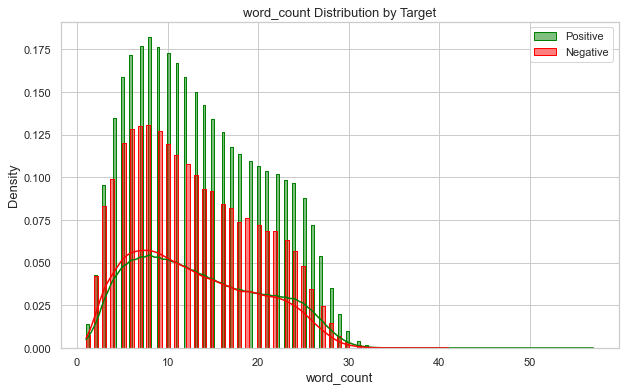

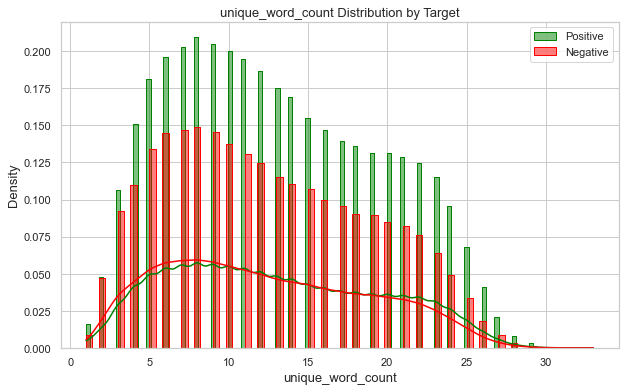

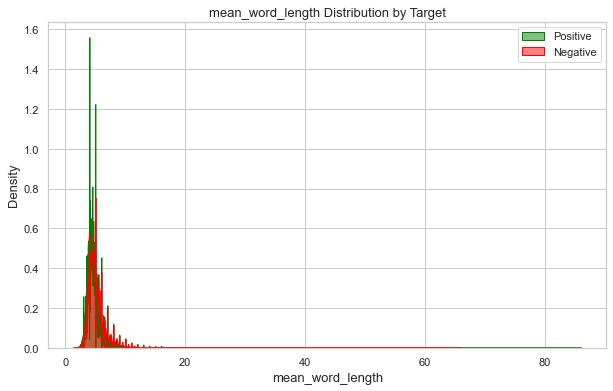

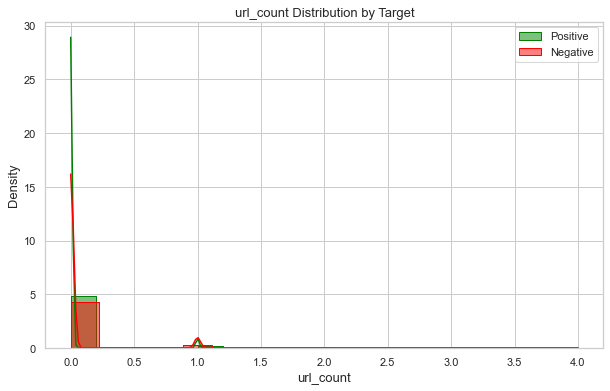

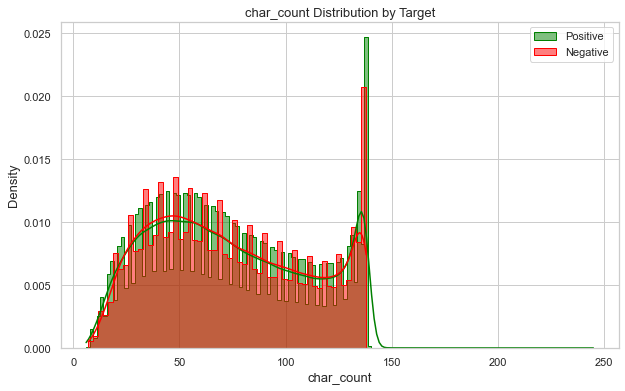

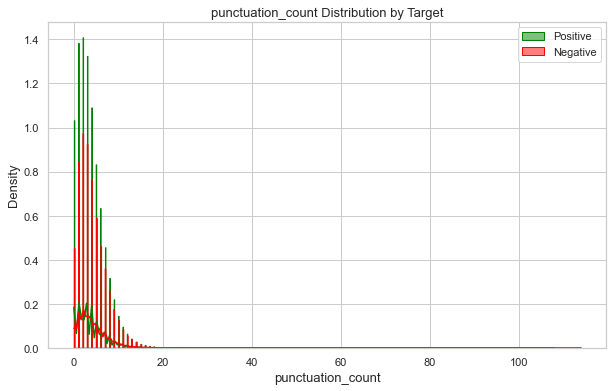

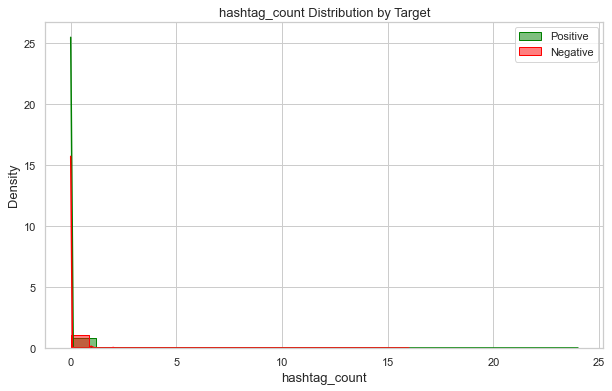

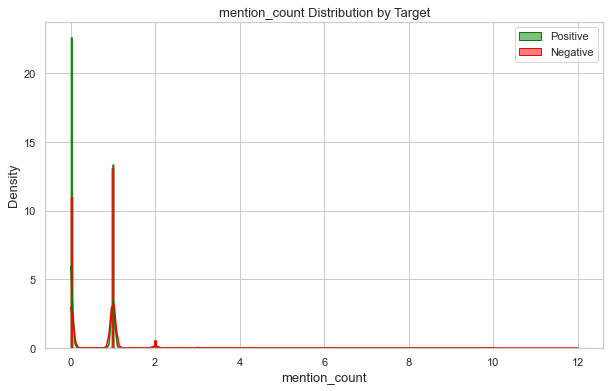

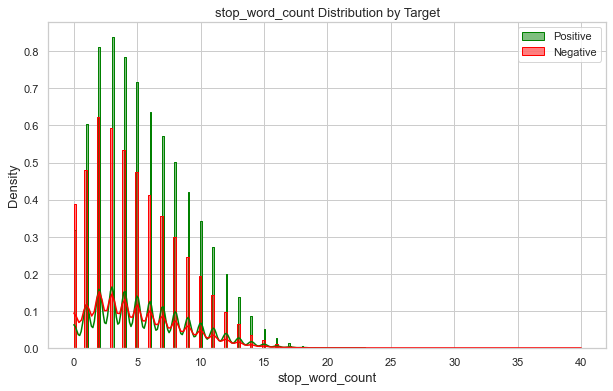

In [21]:
METAFEATURES = ['word_count', 'unique_word_count', 'mean_word_length', 'url_count',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count',
               'stop_word_count']

for feature in METAFEATURES:
    plt.figure(figsize=(10, 6))

    sns.histplot(df_copy[df_copy['Target'] == 0][feature], label='Positive', color='green', kde=True, stat="density", element="step", alpha=0.5)
    sns.histplot(df_copy[df_copy['Target'] == 4][feature], label='Negative', color='red', kde=True, stat="density", element="step", alpha=0.5)
    
    plt.xlabel(feature, fontsize=13)
    plt.ylabel('Density', fontsize=13)
    plt.legend()
    plt.title(f'{feature} Distribution by Target', fontsize=13)
    
    plt.show()

In [22]:
df_copy = df_copy.drop(df_copy[df_copy['char_count'] > 140].index)

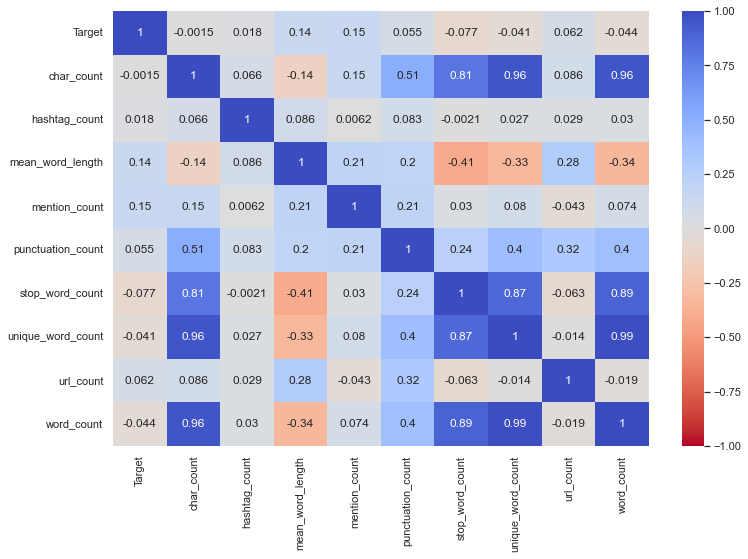

In [23]:
columns_to_include = df_copy.columns.difference(['ID','Year'])
corr_matrix = df_copy[columns_to_include].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', center=0, vmin=-1, vmax=1)
plt.show()

# Sentiment Distribution

## Overall Sentiment Distribution

- This bar plot displays the overall distribution of tweet sentiments (positive and negative) in the dataset.
- Understanding the overall sentiment distribution provides a baseline understanding of the sentiment composition within the dataset.

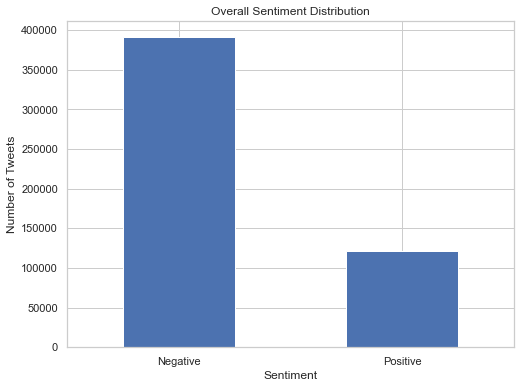

In [24]:
sentiment_counts = df_copy['Target'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

## Sentiment Distribution Over Time

- This line plot shows how the sentiment of tweets changes over time, specifically aggregated by year, month, and day.
- Analyzing sentiment trends over time can reveal patterns, fluctuations, or events that influence sentiment dynamics.

In [25]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

df_copy['Year'] = df_copy['Date'].dt.year
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Day'] = df_copy['Date'].dt.day

daily_sentiments = df_copy.groupby(['Target', 'Year', 'Month', 'Day']).count()['ID']
daily_sentiments = daily_sentiments.unstack(level='Target')
daily_sentiments.reset_index(inplace=True)

daily_sentiments['Date'] = pd.to_datetime(daily_sentiments[['Year', 'Month', 'Day']])

c:\Users\abc\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


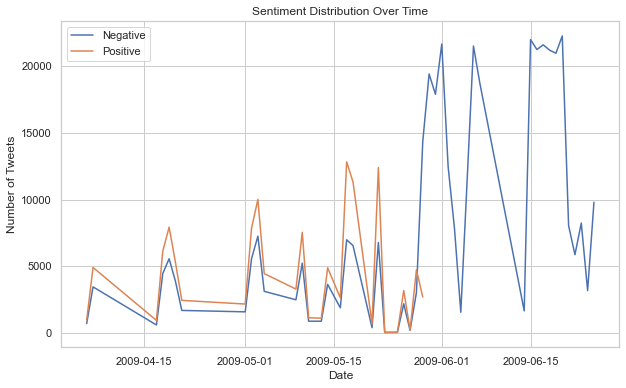

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiments['Date'], daily_sentiments[0], label='Negative')
plt.plot(daily_sentiments['Date'], daily_sentiments[4], label='Positive')

plt.title('Sentiment Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

In [27]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

def get_part_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'
df_copy['part_of_day'] = df_copy['Date'].dt.hour.apply(get_part_of_day)


## Distribution of Sentiments Across Parts of the Day

- This count plot categorizes tweets based on the time of day they were posted (morning, afternoon, evening, or night) and visualizes the distribution of sentiment within each category.
- Analyzing sentiment distribution across different times of the day provides insights into how sentiment varies based on temporal factors such as diurnal rhythms or daily activities.

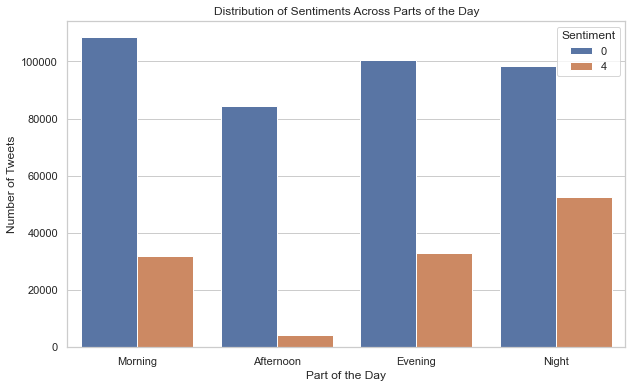

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="part_of_day", hue="Target", data=df_copy, order=['Morning', 'Afternoon', 'Evening', 'Night'])

plt.title('Distribution of Sentiments Across Parts of the Day')
plt.xlabel('Part of the Day')
plt.ylabel('Number of Tweets')

plt.legend(title='Sentiment', loc='upper right')

plt.show()

<Figure size 720x432 with 0 Axes>

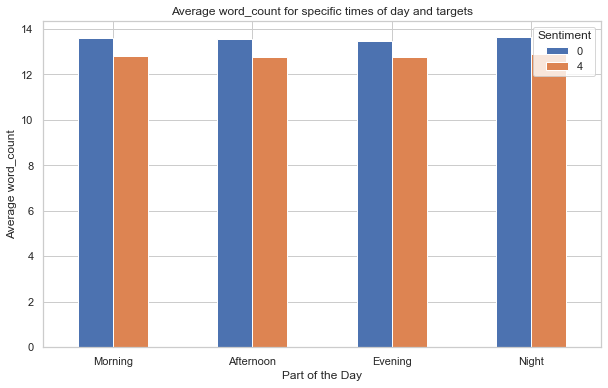

In [29]:
plt.figure(figsize=(10, 6))
mean_word_count = df_copy.groupby(['part_of_day', 'Target'])['word_count'].mean().unstack()

order = ['Morning', 'Afternoon', 'Evening', 'Night']
mean_word_count = mean_word_count.loc[order]

fig, ax = plt.subplots(figsize=(10, 6))
mean_word_count.plot(kind='bar', ax=ax)
plt.title('Average word_count for specific times of day and targets')
plt.xlabel('Part of the Day')
plt.ylabel('Average word_count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', loc='upper right')
plt.show()

# Polarity and target

In [30]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return pd.Series({'polarity': blob.sentiment.polarity})

df_copy['polarity'] = df_copy['Text'].apply(analyze_sentiment)

correlation = df_copy['polarity'].corr(df_copy['Target'])
print("The correlation between polarity and the target:", correlation)

The correlation between polarity and the target: 0.2860557321190217


# Not and target

In [31]:
def contains_not_numeric(text):
    return int('not' in text)
df_copy['contains_not']=df_copy['lemmatized_text'].apply(contains_not_numeric)

In [32]:
# Correlation between the presence of 'not' and the target
correlation = df_copy['contains_not'].corr(df_copy['Target'])
print("The correlation between the presence of 'not' and the target:", correlation)

The correlation between the presence of 'not' and the target: -0.07619625273677573


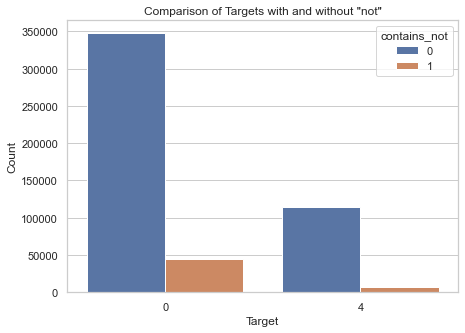

In [33]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Target', hue='contains_not', data=df_copy)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Comparison of Targets with and without "not"')
plt.show()

# Most frequent words in tweets 

In [34]:
all_words = ' '.join(df_copy['lemmatized_text'])
words = all_words.split()
word_freq = pd.Series(words).value_counts()
word_freq_df = word_freq[:20].reset_index()
word_freq_df.columns = ['Word', 'Frequency']

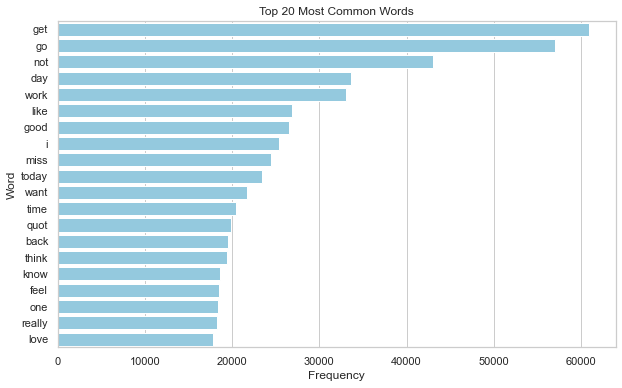

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq_df, y='Word', x='Frequency', color='skyblue')
plt.title('Top 20 Most Common Words')
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.show()


In [46]:
all_words = ' '.join(df_copy['lemmatized_text'])
plt.figure(figsize=(10, 6), facecolor = 'None')
wordcloud = WordCloud(max_words=100, width = 1600, height = 800).generate(all_words)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent Words', fontsize = 20)
plt.show()

In [40]:
all_words_negative = ' '.join(df_copy[df_copy['Target'] == 0]['lemmatized_text'])
words_negative = all_words_negative.split()
word_freq_negative = pd.Series(words_negative).value_counts()
word_freq_df_negative = word_freq_negative[:20].reset_index()
word_freq_df_negative.columns = ['Word', 'Frequency']

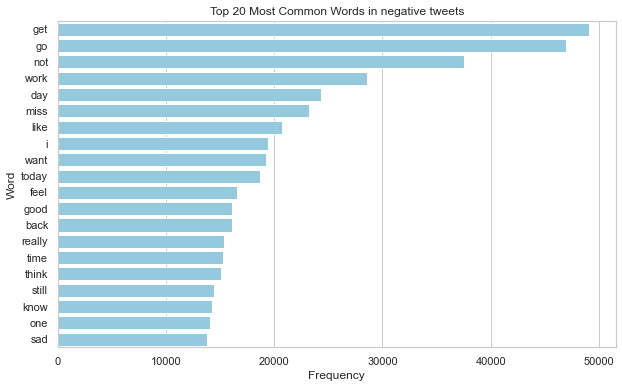

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq_df_negative, y='Word', x='Frequency', color='skyblue')
plt.title('Top 20 Most Common Words in negative tweets')
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.show()

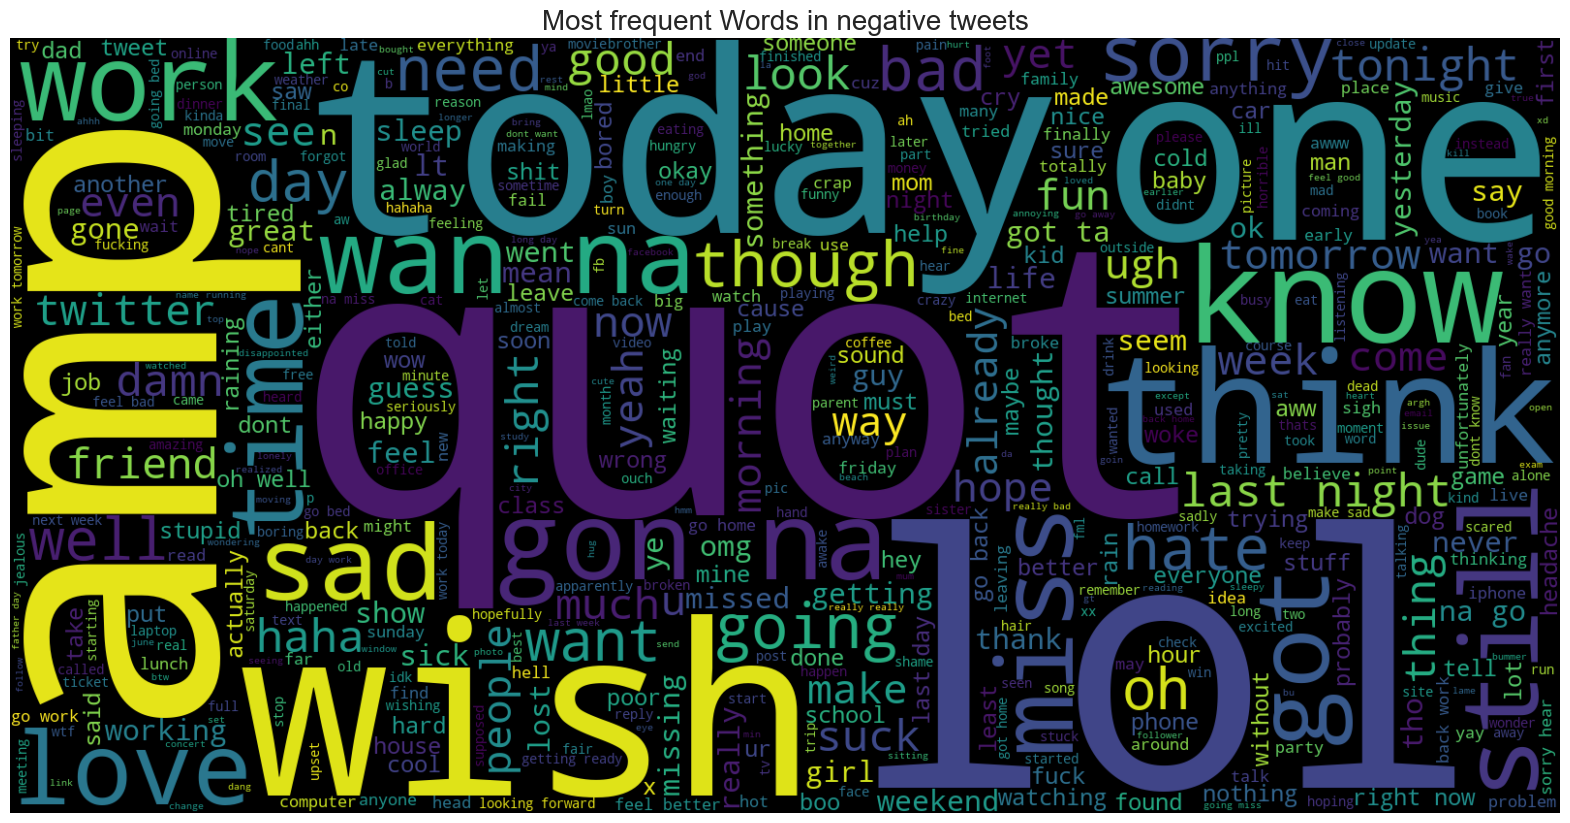

In [ ]:
all_words_negative = ' '.join(df_copy[df_copy['Target'] == 0]['lemmatized_text'])
plt.figure(figsize=(10, 6), facecolor = 'None')
wordcloud = WordCloud(max_words=500, width = 1600, height = 800).generate(all_words_negative)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent Words in negative tweets', fontsize = 20)
plt.show()

In [42]:
all_words_positive = ' '.join(df_copy[df_copy['Target'] == 4]['lemmatized_text'])
words_positive = all_words_positive.split()
word_freq_positive = pd.Series(words_positive).value_counts()
word_freq_df_positive = word_freq_positive[:20].reset_index()
word_freq_df_positive.columns = ['Word', 'Frequency']

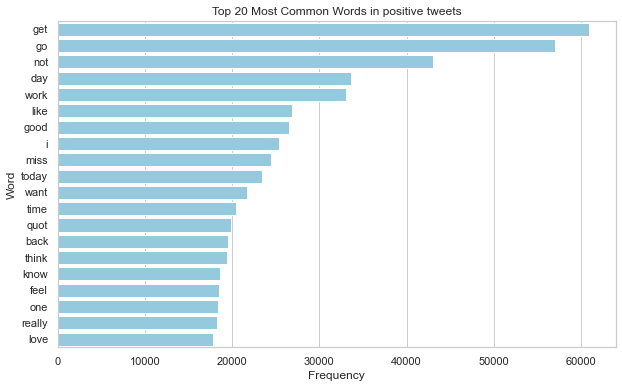

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq_df, y='Word', x='Frequency', color='skyblue')
plt.title('Top 20 Most Common Words in positive tweets')
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.show()

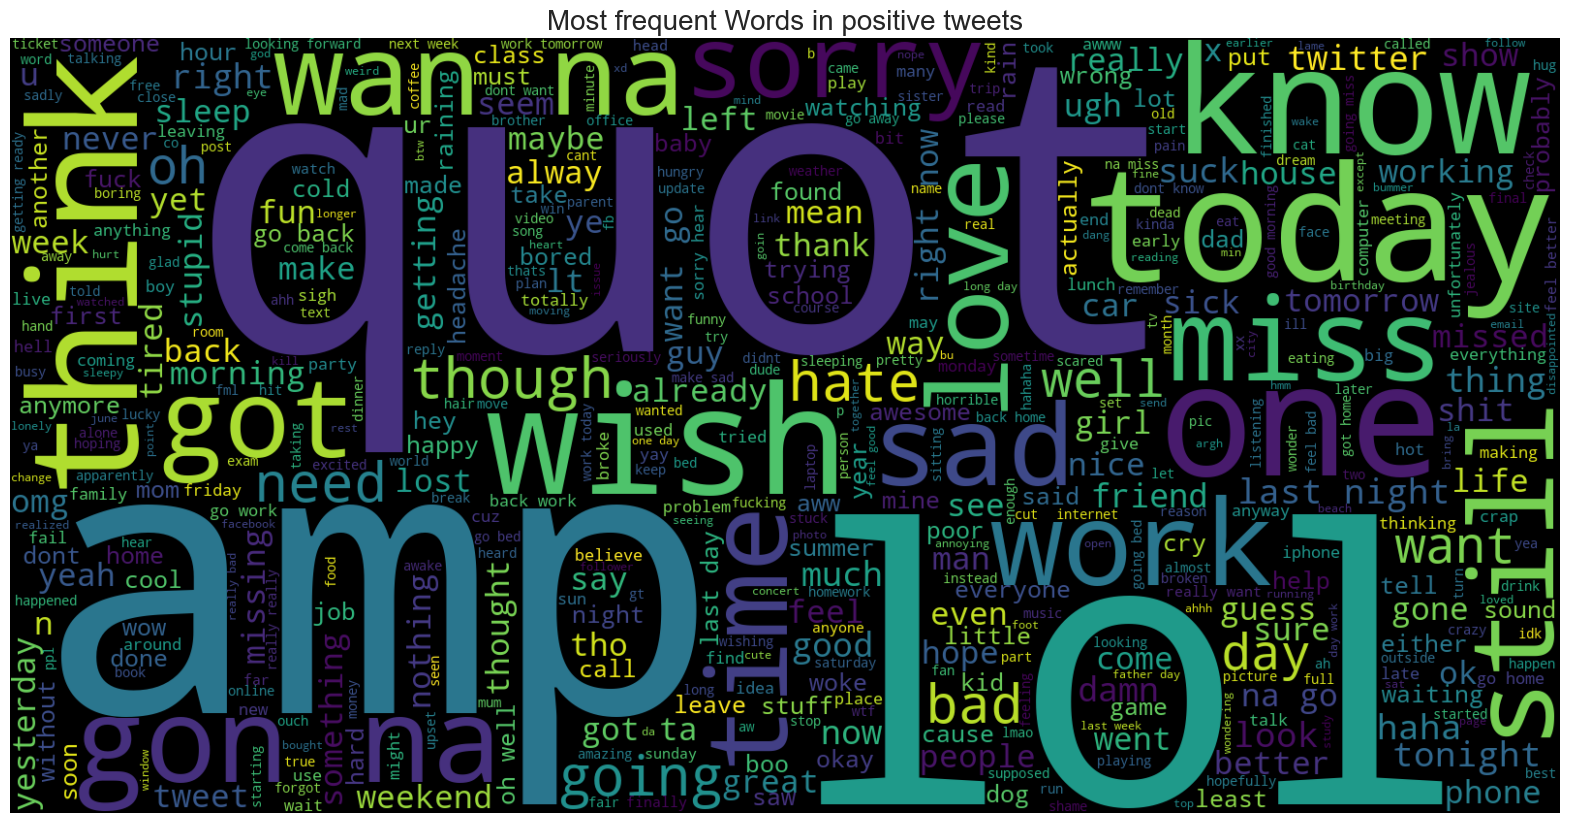

In [ ]:
all_words_positive = ' '.join(df_copy[df_copy['Target'] == 4]['lemmatized_text'])
plt.figure(figsize=(10, 6), facecolor = 'None')
wordcloud = WordCloud(max_words=500, width = 1600, height = 800).generate(all_words_negative)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent Words in positive tweets', fontsize = 20)
plt.show()

## Analysis of Hashtag Popularity in Text Data

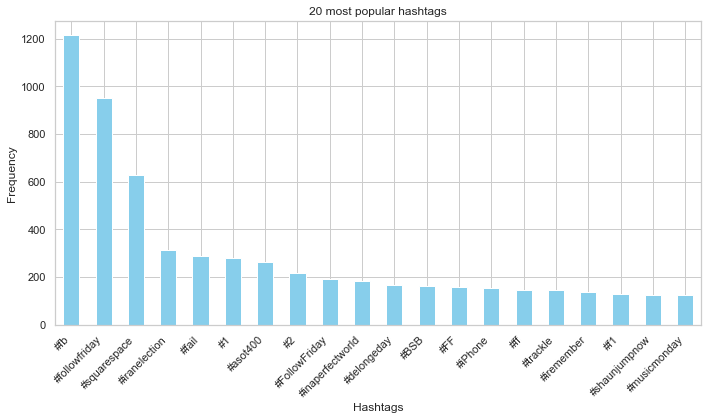

In [31]:
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return hashtags

all_hashtags = df_copy['Text'].apply(extract_hashtags).sum()

hashtags_count = pd.Series(all_hashtags).value_counts()

top_20_hashtags = hashtags_count.head(20)

plt.figure(figsize=(10, 6))
top_20_hashtags.plot(kind='bar', color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('20 most popular hashtags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

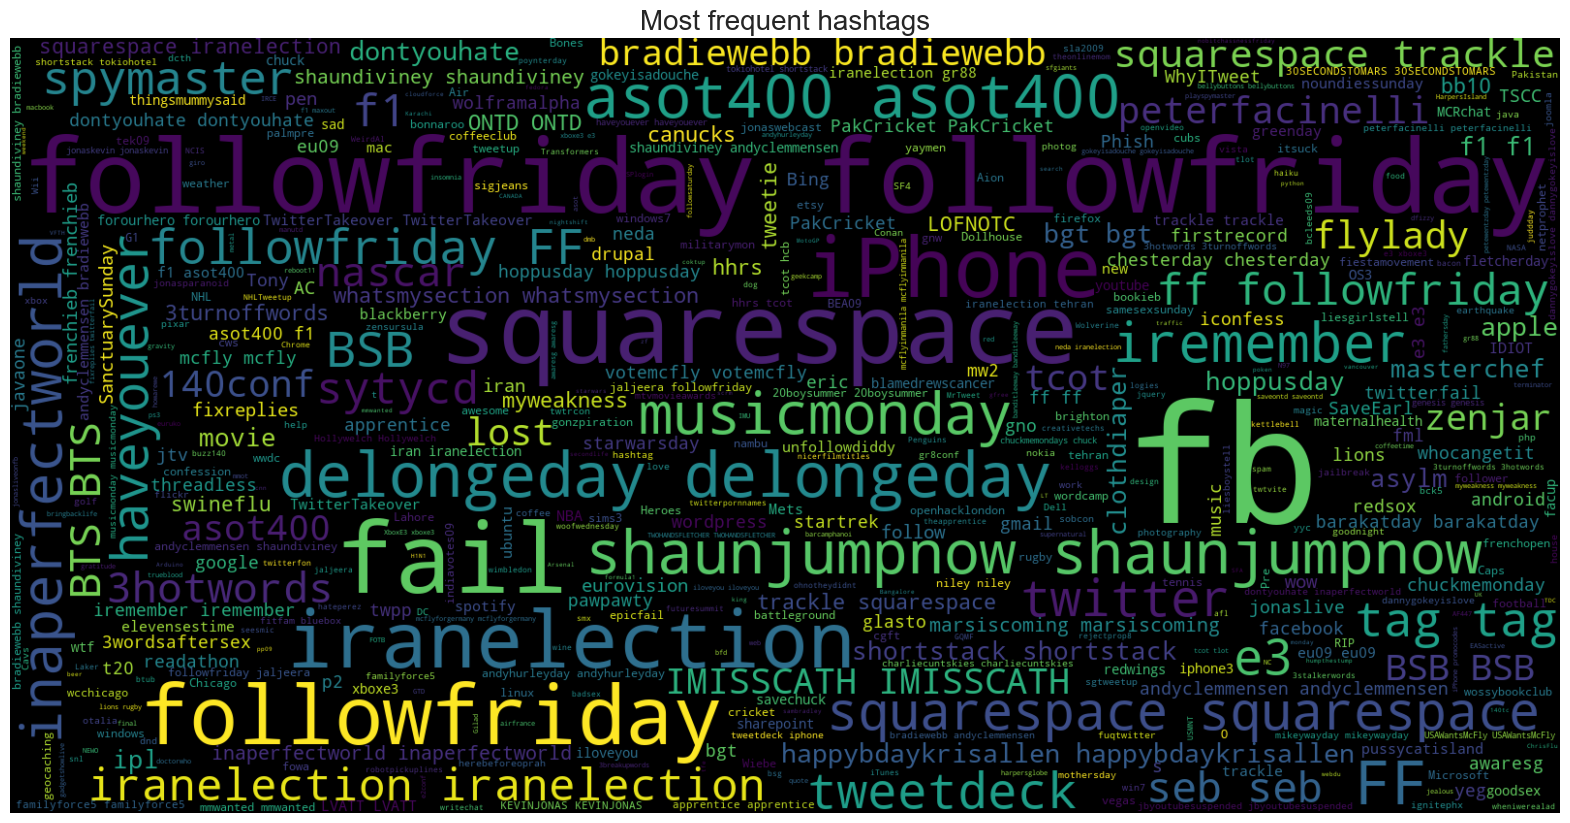

In [ ]:
all_hashtags = df_copy['Text'].apply(extract_hashtags).sum()
all_hashtags_text = ' '.join(all_hashtags)

plt.figure(figsize=(10, 6), facecolor = 'None')
wordcloud = WordCloud(max_words=500, width = 1600, height = 800).generate(all_hashtags_text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent hashtags', fontsize = 20)
plt.show()

## Network Graph of Hashtag Co-Occurrences
This network graph helps to understand the connections and relationships between hashtags in the text data, providing insights into the overall structure and patterns of hashtag usage.

In [63]:
all_hashtags = df_copy['Text'].apply(extract_hashtags).tolist()

co_occurrences = Counter()
for hashtags in all_hashtags:
    co_occurrences.update((hashtag1, hashtag2) for hashtag1 in hashtags for hashtag2 in hashtags if hashtag1 != hashtag2)

G = nx.Graph()

for (hashtag1, hashtag2), weight in co_occurrences.items():
    G.add_edge(hashtag1, hashtag2, weight=weight)


In [69]:
nodes = list(G.nodes())
edges = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]

pyvis_network = Network(height="750px", width="100%", notebook=True)
pyvis_network.add_nodes(nodes)
for edge in edges:
    src, dst, weight = edge
    pyvis_network.add_edge(src, dst, value=weight)
    
pyvis_network.show('interactive_graph.html')


interactive_graph.html
